In [36]:
# !pip install seaborn
# !pip install sklearn
!pip3 install -U scikit-learn
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

/bin/bash: /home/vivek/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
^C
ERROR: Operation cancelled by user


In [82]:
# import matplotlib.pyplot as plt
# plt.figure()
# label = ["Train","Val","Test"] 

# values = [9384,3128,3615]
# plt.pie(values, labels=label, autopct='%.0f%%') #autopct??
# plt.show()
# plt.savefig("dataset.png")

In [4]:
import numpy as np
np.array([9384,3128,3615]).sum()

16127

In [ ]:
!sudo cp -r ../Downloads/ /home/vivek/cs725/project

In [42]:
import pandas as pd
df = pd.read_csv('totalwithmaininfo1.csv',sep=',')
df = df.drop(df.columns[0],axis=1)

In [43]:
df.Y = df.Y.astype('int')

In [44]:
df

,MAR,Circulatory,MOE,EAR_N,MAR_N,Circulatory_N,MOE_N,Y
0,0.990172,0.377137,3.819529,-2.871484,-1.311146,-3.324272,0.003040,0
1,0.904440,0.447990,3.141738,-2.842845,-1.396878,-3.253419,-0.674751,0
2,0.452492,0.334622,2.521654,-2.951281,-1.848826,-3.366788,-1.294835,0
3,0.518949,0.443054,1.790334,-2.840862,-1.782368,-3.258356,-2.026155,0
4,0.752099,0.442154,2.606156,-2.842138,-1.549219,-3.259255,-1.210333,0
...,...,...,...,...,...,...,...,...
1702,2.066571,0.730736,3.950920,-2.607663,-0.234747,-2.970673,0.134431,10
1703,0.835846,0.497353,2.413022,-2.784334,-1.465472,-3.204056,-1.403467,10
1704,0.805139,0.388743,3.031112,-2.865099,-1.496179,-3.312666,-0.785377,10
1705,0.965248,0.425491,3.723386,-2.871484,-1.336070,-3.275919,-0.093103,10


In [63]:
y = df['Y'].values
X = df.drop(['Y'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
set(df['Y'])

{0, 5, 10}

In [83]:
# X_test
# y_test

In [66]:

X_train

,MAR,Circulatory,MOE,EAR_N,MAR_N,Circulatory_N,MOE_N
590,0.901497,0.350021,3.974246,-2.903889,-1.399821,-3.351389,0.157757
1550,1.316432,0.486842,4.944401,-2.864477,-0.984886,-3.214567,1.127912
420,1.022930,0.469267,3.175533,-2.808595,-1.278388,-3.232142,-0.640956
425,0.897647,0.493887,2.570931,-2.781571,-1.403671,-3.207522,-1.245558
857,2.607681,0.819381,4.583921,-2.561848,0.306363,-2.882028,0.767432
...,...,...,...,...,...,...,...
1130,1.031808,0.467084,3.500934,-2.836000,-1.269510,-3.234326,-0.315556
1294,0.348171,0.295078,2.446905,-2.988433,-1.953147,-3.406332,-1.369584
860,0.877609,0.448996,2.754042,-2.812062,-1.423709,-3.252413,-1.062447
1459,0.667987,0.343654,2.961117,-2.905137,-1.633330,-3.357755,-0.855373


In [84]:
# X_train= X_train.to_numpy().reshape(-1, 1)
# X_train

In [61]:
# X_test= X_test.to_numpy().reshape(-1, 1)
# X_test
set(y_test)

{0, 5, 10}

## 1. Logistic Regression

In [69]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
# y_pred_1 = average(y_pred_1)
print(y_pred_1)
y_score_1 = clf.predict_proba(X_test)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1,average='weighted')
# roc_1 = metrics.roc_auc_score(y_test, y_score_1)
print([acc1,f1_score_1])
print(confusion_matrix(y_test, y_pred_1))

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  5 10 10 10 10 10
 10 10 10 10 10  5 10 10 10  5  5  5 10 10 10 10 10 10 10 10 10 10 10  5
 10 10 10 10 10  5 10 10 10  5 10 10 10 10 10 10 10 10 10 10 10  5 10 10
 10 10  5 10 10 10 10 10  5 10 10 10 10 10 10 10 10 10 10 10  5  5  5 10
 10 10  5 10 10 10 10 10 10 10 10 10  5  5 10 10 10  5 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10  5 10 10 10 10 10  5 10 10 10 10 10 10  5 10  5
 10  5 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10  5 10 10 10 10 10 10 10 10  5 10 10 10
 10 10 10 10 10 10 10 10 10  5 10 10 10  5 10 10 10 10 10 10  5  5 10 10
 10 10 10 10  5 10 10 10 10 10 10 10 10 10 10  5 10 10 10 10 10  5 10 10
 10 10 10 10  5 10 10 10 10 10 10 10 10 10 10 10  5 10 10 10 10 10 10 10
  5 10 10 10  5 10 10 10 10 10 10 10 10  5 10 10 10 10 10 10 10  5 10 10
 10 10 10 10 10  5  5 10 10 10 10  5 10 10 10 10 10

## 2. Naive Bayes

In [70]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
# pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB,average=None)
# roc_2 = metrics.roc_auc_score(y_test, y_score_2)
print([acc2,f1_score_2])
print(confusion_matrix(y_test, pred_NB))

[0.30701754385964913, array([0.04379562, 0.46534653, 0.11188811])]
[[  3 106  16]
 [  4  94  22]
 [  5  84   8]]


## 3. Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
acc3=[]
max_depth = []
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    # pred_DT = average(pred_DT)
    acc3.append(accuracy_score(pred_DT, y_test))
    max_depth.append(i)
print (max(acc3))

0.2309941520467836


In [77]:
 best_depth = max_depth[acc3.index(max(acc3))]

In [78]:
 best_depth

2

,Accuracy
Model,
Logistic Regression,0.301170
Naive Bayes,0.307018
Decision Tree,0.230994


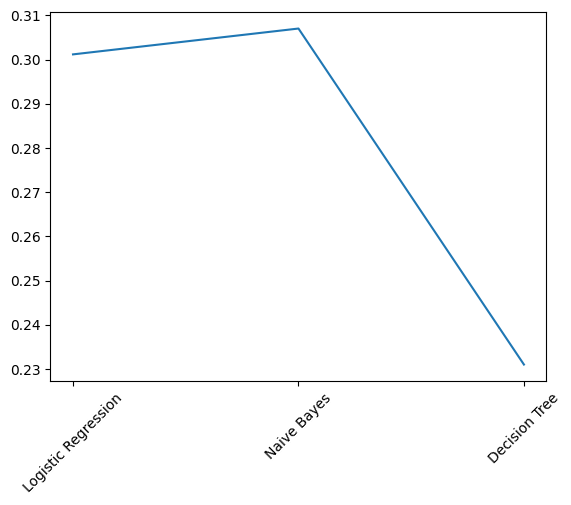

In [81]:
acc_total = {'Model':['Logistic Regression','Naive Bayes','Decision Tree'],
        'Accuracy':[acc1,acc2, acc3]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total